In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# dropping unnecessary column
df.drop(columns = ['Unnamed: 0', 'year', 'month'], axis = 1, inplace = True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

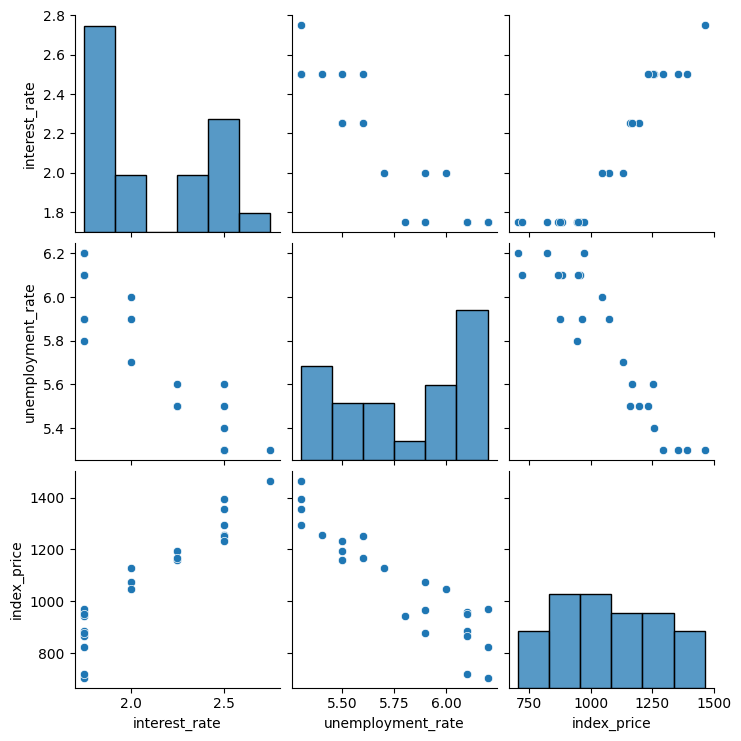

In [5]:
# Visualization
sns.pairplot(df)

In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment_rate')

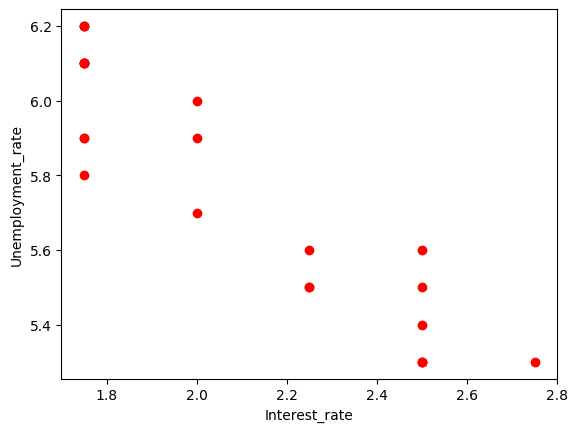

In [7]:
# visualize data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'], color = 'r')
plt.xlabel('Interest_rate')
plt.ylabel('Unemployment_rate')

In [8]:
# independent and dependent
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

In [9]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [10]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [11]:
# train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 2) (6, 2) (18,) (6,)


<Axes: xlabel='interest_rate', ylabel='index_price'>

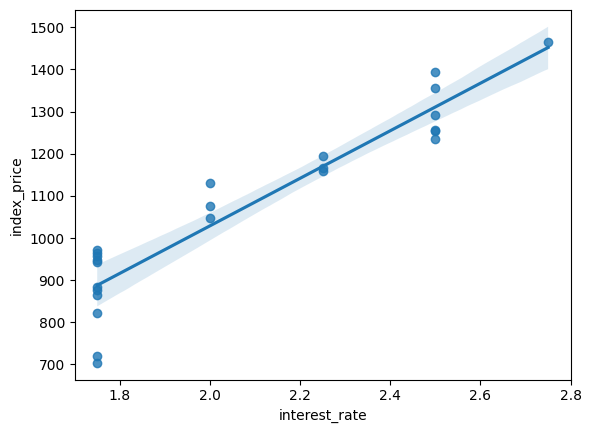

In [13]:
sns.regplot(x = df['interest_rate'], y = df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

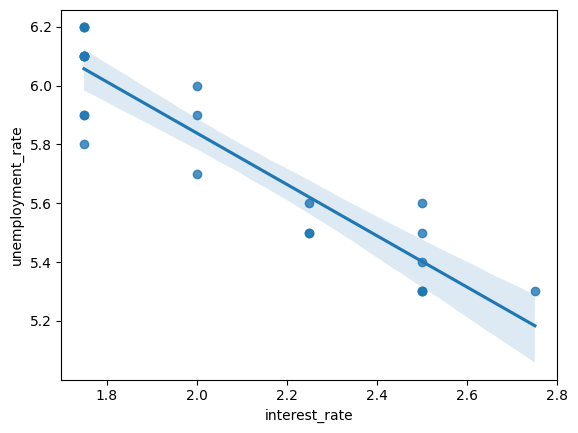

In [14]:
sns.regplot(x = df['interest_rate'], y = df['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

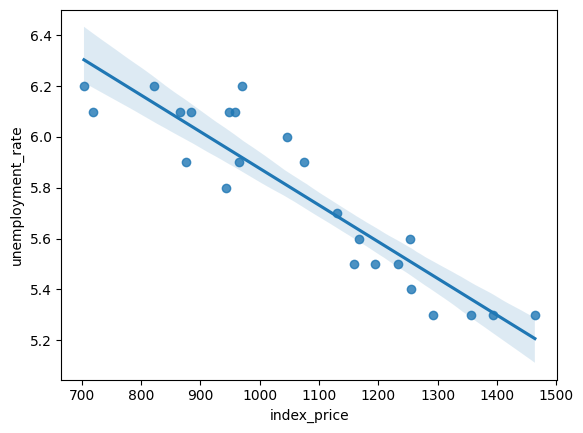

In [15]:
sns.regplot(x = df['index_price'], y = df['unemployment_rate'])

In [16]:
# standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [19]:
# LR
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# cross validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 3)

In [22]:
np.mean(validation_score)

-5914.828180162386

In [23]:
# prediction 
y_pred = model.predict(X_test)


In [24]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [25]:
# Performance matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [27]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.7591371539010257

In [28]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.5985619231683761

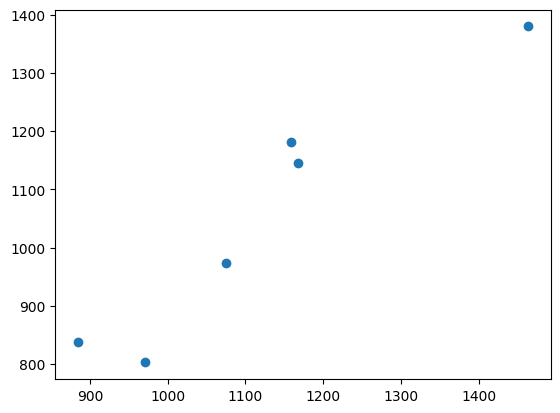

In [29]:
# Assumption
plt.scatter(y_test, y_pred)

In [30]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

C:\Users\anoop\AppData\Local\Temp\ipykernel_6232\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='index_price', ylabel='Density'>

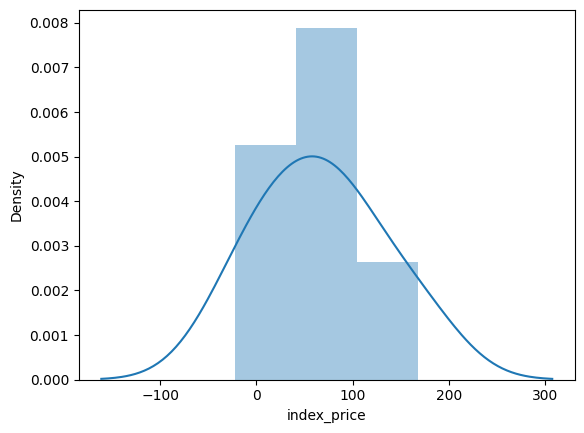

In [33]:
sns.distplot(residuals)

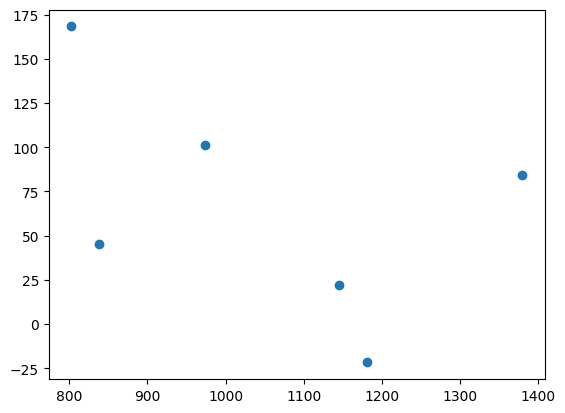

In [35]:
# scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

# OLS Technique 

In [36]:
import statsmodels.api as sm

In [37]:
model1 = sm.OLS(y_train, X_train).fit()
model1

In [38]:
prediction = model1.predict(X_test)
prediction

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [39]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 20 May 2024   Prob (F-statistic):                       0.754
Time:                        22:49:04   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\anoop\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [40]:
model.coef_

array([  88.27275507, -116.25716066])

In [42]:
model.intercept_

1053.4444444444443